In [1]:
from idtxl.data import Data
from idtxl.multivariate_te import MultivariateTE
from idtxl.visualise_graph import plot_network
import matplotlib.pyplot as plt
import numpy as np
import hurwitz



ModuleNotFoundError: No module named 'hurwitz'

In [36]:
A = np.matrix([
        [-0.5,0.0, 0.0, 0.0, -1.0],
        [-1.0, -0.5, 0.0, 0.0 ,0.0],
        [0.0, -1.0, -0.5, 0.0, 0.0],
        [0.0, 0.0, -1.0, -0.5, 0.0],
        [0.0, 0.0, 0.0, -1.0, -0.5]
    ])

data_np = hurwitz.run_process(A, 500, 0.5)
print(data_np.shape)
dt = Data(data_np, dim_order = "sp")

Generating, compiling, and loading C code.
Using default integration parameters.
(1000, 5)
Adding data with properties: 5 processes, 1000 samples, 1 replications
overwriting existing data


In [37]:
network_analysis = MultivariateTE()
settings = {'cmi_estimator': 'JidtKraskovCMI',
            'max_lag_sources': 2,
            'min_lag_sources': 1,
            'n_perm_max_stat': 1000, # Maximum test
            'alpha_max_stat': 0.05,
            'n_perm_min_stat': 200, # Minimum test
            'alpha_min_stat': 0.05,
            'n_perm_omnibus': 500, # Omnibus
            'alpha_omnibus': 0.05,
            'permute_in_time': True}

In [38]:
results = network_analysis.analyse_network(settings=settings, data=dt)


####### analysing target with index 0 from list [0, 1, 2, 3, 4]

Target: 0 - testing sources [1, 2, 3, 4]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2)]
testing candidate: (0, 1) maximum statistic, n_perm: 1000
testing candidate: (0, 2) maximum statistic, n_perm: 1000
 -- not significant

---------------------------- (2) include source candidates
candidate set: [(1, 1), (1, 2), (2, 1), (2, 2), (3, 1), (3, 2), (4, 1), (4, 2)]
testing candidate: (4, 1) maximum statistic, n_perm: 1000
testing candidate: (2, 2) maximum statistic, n_perm: 1000
 -- not significant

---------------------------- (3) prune source candidate
selected candidates: [(4, 1)]
 -- significant

---------------------------- (4) final statistics
selected variables: [(0, 1), (4, 1)]
omnibus test, n_perm: 500
 -- significant

sequential maximum statistic, n_perm: 500, testing 1 selected sources
final source samples: [(4, 1)]
final target samples: [(0, 1)]



####### analysing ta

	0 -> 1, max_te_lag: 1
	1 -> 2, max_te_lag: 2
	2 -> 3, max_te_lag: 2
	3 -> 4, max_te_lag: 1
	4 -> 0, max_te_lag: 1


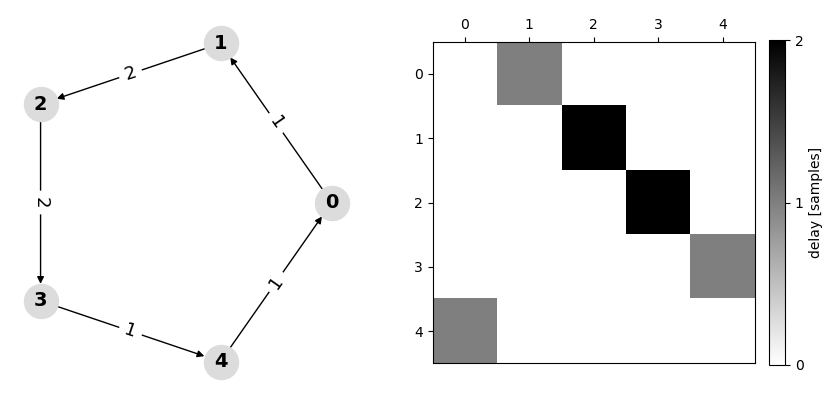

In [39]:
results.print_edge_list(weights='max_te_lag', fdr=False)
plot_network(results=results, weights='max_te_lag', fdr=False)
plt.show()